# Creating a dashboard with external python package plotly

<h4> Here I would like to add help to those who find difficult to view the graph in jupyter notebook.</h4><p>On this issue i almost spent a day but couldn't figure out the solution. Next day I came accross an article which gave me some strength knowing that I'm not only stuck in this for a day. It wasn't helpful but since it was for <u>Ubuntu and Raspbian operating systems</u>. <a href="https://www.pyimagesearch.com/2015/08/24/resolved-matplotlib-figures-not-showing-up-or-displaying/">This is the Link for the article</a>.Then I came across <a href="https://stackoverflow.com/questions/59812824/plotly-express-plot-not-shown-in-jupyter-notebook">This</a> Answer; but it wasn't right solution for my issue. Then searching and googling for an hour I found <a href="https://stackoverflow.com/questions/52771328/plotly-chart-not-showing-in-jupyter-notebook">This Article on StackOverflow</a>. Among all the answers, answer by 'Gonçalo Peres 龚燿禄' helped me sove my problem.</p>

In [1]:
!pip install --upgrade plotly sklearn

Requirement already up-to-date: plotly in c:\users\aastha\anaconda3\lib\site-packages (5.1.0)
Requirement already up-to-date: sklearn in c:\users\aastha\anaconda3\lib\site-packages (0.0)


In [ ]:
#!pip install @jupyter-widgets/jupyterlab-manager plotlywidget

In [2]:
!jupyter labextension list

JupyterLab v2.2.6
Known labextensions:


   app dir: C:\Users\Aastha\anaconda3\share\jupyter\lab
        jupyterlab-plotly v4.14.3 enabled  ok


In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris() #it returns the dictionary type object of data
print(iris.keys()) #Here we are seeing what keys iris dictionary got.
print(iris['frame']) #Here we are trying to see what the frame key contains

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
None


In [4]:
#Here we are trying to see what DESCR key contians.
print(iris['DESCR'])
#It contains the description of dataset. After reading it we get sight of how our data is arranged.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
#Here we are trying to see what does 'target' key contains
print(iris['target_names'])
print(iris['target'])
#As the name suggests 'target' is that we find that is the type of flower
#from above description we can draw conclusion that:
#0: Iris-Setosa
#1: Iris-Versicolour
#2: Iris-Verginica

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
#'feature_names' contains the name of the data columns.
#From the key name 'data' we can say that it contains the values or the features or data that we need to predict our target.
print(iris['feature_names'])
print(iris['data'][:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [7]:
#Now to use this data, we need to convert it from dictionary to dataframe.
iris_df = pd.DataFrame(data=np.concatenate((iris.data, iris.target.reshape(-1,1)), axis=1),
                        columns=(iris.feature_names + ['Flower_type']))
iris_df['Flower_name'] = [iris.target_names[int(i)] for i in iris_df['Flower_type']]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower_type,Flower_name
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [13]:
#Here we would like to see correlation of the data
#We need to see correlation with respect to Flower_type this is our target.
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower_type
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Flower_type,0.782561,-0.426658,0.949035,0.956547,1.000000


In [8]:
import plotly.express as px

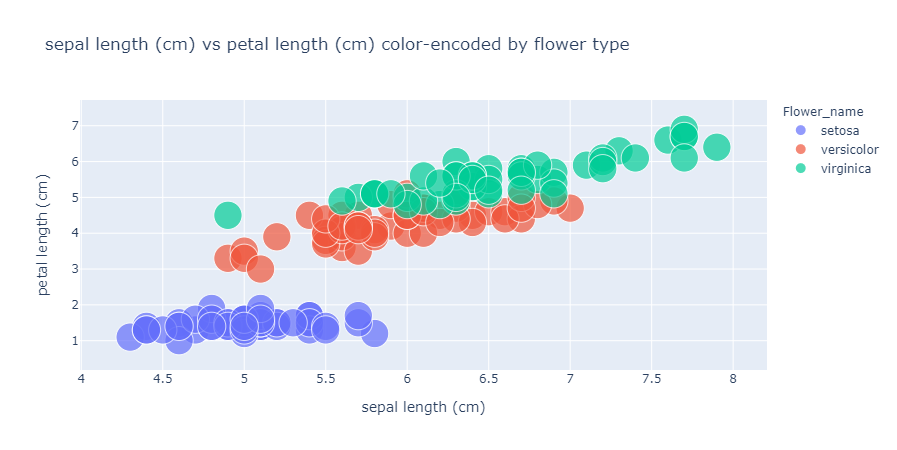

In [12]:
#Here we are going to draw scatter plot.
chart1 = px.scatter(iris_df,
                    x="sepal length (cm)",
                    y="petal length (cm)",
                    size=[.1]*150,
                    color="Flower_name",
                    title="sepal length (cm) vs petal length (cm) color-encoded by flower type"
                   )
chart1.show()

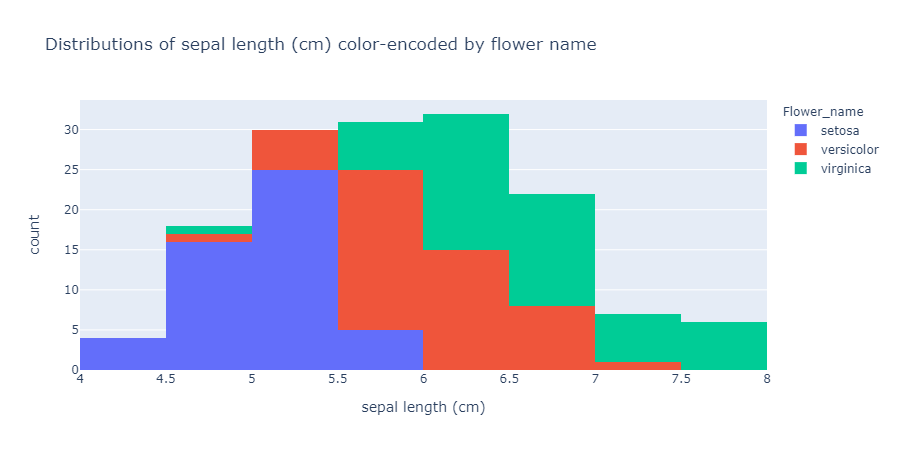

In [15]:
#Here we are going to draw histogram plot
chart2 = px.histogram(iris_df,
                   x="sepal length (cm)",
                   color="Flower_name",
                   title="Distributions of sepal length (cm) color-encoded by flower name")
chart2.show()

# The target in this dataset is to categorize the wines into 0,1,2.